In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata

# Regresión Logistica

Vamos a utilizar el MNIST data set para este ejercicio de regresión logística, el data set contiene imágenes de los dígitos del 0 al 9. Por el momento vamos a hacer una clasificación binaria por lo que nuestro algoritmo nos va a dar como resultado la probabilidad de que un digito sea *6*.

# Data

In [2]:
mnist = fetch_mldata('MNIST original')

## Explorando los datos

La estructura de este data set es similar a la de un diccionario:
* DESCR: Llave que contiene la descripcion del set de datos

* DATA: Esta llave contiene un arreglo con una fila por instania u una columna por feature

* TARGET: Esta llave contiene un arreglo con las labels

In [3]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

Exploremos los datos para entender la data, empecemos con imprir la forma de los datos

In [3]:
X, y = mnist["data"], mnist["target"]
print('X Shape: ', X.shape)
print('y Shape: ', y.shape)

X Shape:  (70000, 784)
y Shape:  (70000,)


Hay 70,000 imagenes, cada imagen tiene 784 features.
Son 784 feautures por imagen, porque cada imagen es de 28x28 pixeles, cada pixel de la imagen es una feature para nosotros, cada feature va a tener un valor entre 0 (blanco) y 255 (negro).

Examinenos un ejemplo:

In [4]:
def mostrar_digito(digito):
    digito = digito.reshape(28, 28)

    plt.imshow(digito, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    plt.show()

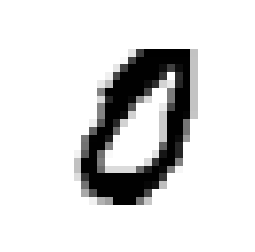

In [5]:
algun_digito = X[10]
mostrar_digito(algun_digito)

In [6]:
## Imprimimos el valor del label ##
y[10]

0.0

# Feature escala y normalizacion


### Normalizacion
Este proceso se aplica en machine learning para manejar de mejor manera los datos, de preferencia valores entre 0 y 1, podemos utilizar la siguiente formula:

$z_{i}= {\frac {x_{i}−min(x)} {max(x)−min(x)}}$

Debemos considerar lo siguiente:
* Mis variables estan en una escala comparable?
* Mi varaible es discreta, deberia de transformala en continua?

En este caso nuestras features estan en valores entre 0 y 255, Como los transformamos en una escala entre 0 y 1??
A continuacion vamos a implementar la funcion normalizacion que va a recibir de parametro 

In [13]:

def normalizar(features):
    
    ### INICIO: TU CODIGO AQUI: ###
    features = ((features-features.min())/(features.max() - features.min()))

    ### FIN ###########
    
    return features

In [14]:
X_normalizado = normalizar(X)

In [15]:
X_normalizado[100]
## los valores deben estar entre 0 y 1

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Estandarización o Z-score Normalizacion 

El objetivo es cambiar la escala de las features a modo que tengan las propiedades de una distribución estadar normal. Se calcula de la siguiente manera:

$z = {\frac {x - \mu} {\sigma}}$

 Esto quiere decir que las features van a estar centradas cerca de 0 ($\mu$=0) con una desviación estándar de 1 ($\sigma$=1). Esto es útil en machine learning en algoritmos que utilizan gradient descent si tenemos features en diferentes escalas puede que ciertos pesos se actualicen mas rápido que otros.
 
#### Estandarización o Z-score Normalizacion con Scikit-lean
Para calcular los z-scores de las features vamos a utilizar una funcion de Scicit-lean

In [16]:
from sklearn import preprocessing

def estandarizacion(features):
    std_scale = preprocessing.StandardScaler().fit(features)
    df_std = std_scale.transform(features)
    
    return df_std

In [17]:
X_estandarizado = estandarizacion(X)
X_estandarizado[100]

C:\Users\Isa Miranda\Documents\UFM\7mo SEMESTRE\Machine_Learning\envs\ml_ufm\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -4.09033971e-03, -5.32791506e-03, -3.77967173e-03, -3.77967173e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -3.77967173e-03, -5.76560474e-03, -8.56450342e-03, -1.13679013e-02,
       -1.46487258e-02, -1.91989290e-02, -2.44645869e-02, -3.01635248e-02,
       -3.19591431e-02, -3.22334599e-02, -3.30400834e-02, -3.08682833e-02,
       -3.02683577e-02, -2.74423638e-02, -2.29285604e-02, -1.85337642e-02,
       -1.61142119e-02, -1.01805633e-02, -7.70728530e-03, -4.05572859e-03,
        0.00000000e+00,  

### Z-score estandar or Min-Max escala?
Depende de la aplicacion por eso mas adelante luego de completar el algoritmo de entrenamiento vamos a experimentar con los 2 para comprar resultados.

## Test y Train Set

** Importante **, el data set MNIST ya esta dividido en training set y test set.
Las primeras 60,000 imagenes son el training set y las 10,000 restantes son son test set, en la siguiente celda vamos a separar los datos.

In [18]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

** Importante **, Muchos algoritmos de machine learning se pueden ver afectados si los datos de entrenamiento estan en orden, en esta caso pareciera que las 10 clases de digitos enstan en orden y esto va a causar que nuestro algoritmo de clasificacion funcione mal, por lo que hay que cambiar el orden de los datos.

In [19]:
print(y[10])
print(y[100])
print(y[30000])
print(y[40000])
print(y[50000])

## Prueba de que los datos estan ordenados ##

0.0
0.0
4.0
6.0
8.0


In [20]:
## Cambiando el orden ##
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Hipotesis

Funcion Sigmoid:

$sig(t) = {\frac {1} {1 + e^{-t}}}$

combinamos la función sigmoid/lógistica con esta hipótesis conocida tenemos la nueva hipótesis para clasificación con regresión lógistica:

$z = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \ldots + \theta_{n}x_{n}$

$g(z) = {\frac {1} {1 + e^{-z}}}$

** Hipótesis para clasificación con regresión logística: **

$h_{\theta}(x) = {\frac {1} {1 + e^{-(\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \ldots + \theta_{n}x_{n})}}}$

Vamos a construir la Hipotesis por partes, la primer parte es la funcion sigmoid, en la siguiente celda vamos a programar la funcion sigmoid.

Vamos a usar el exponencial de numpy de esta forma : `np.exp(x)`

In [26]:
## Sigmoid 

def sigmoid(z):
    ### INICIO: TU CODIGO AQUI: ###
    s = 1/(1 + np.exp(-z))
    ### FIN ##
    
    return s

In [27]:
### Validando nuestra funcion sigmoid
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(9.2) = " + str(sigmoid(9.2)))

sigmoid(0) = 0.5
sigmoid(9.2) = 0.9998989708060922


#### Resultados esperados

**sigmoid(0)** = 0.5

**sigmoid(9.2)** = 0.999898970806


Implementado la funcion de hipótesis para clasificación con regresión logística

** Hipótesis para clasificación con regresión logística: **

$h_{\theta}(x) = {\frac {1} {1 + e^{-(\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \ldots + \theta_{n}x_{n})}}}$

In [29]:
def get_hipotesis(features, theta_values):
    ## Calculo de la hipotesis de froma vectorizada ##
    z = features.dot(theta_values)
    
    ### INICIO: TU CODIGO AQUI: ###
    h = sigmoid(z)
    #########
    
    return h

# Costo

$J(\Theta) = - {\frac {1}{m}}\sum _{i=1}^{m} y \log(h(x)) + (1-y)\log(1-h(x))$

Utiliza la funcion log de numpy, Ejemplo:
`np.log(y)`

In [43]:
def costo(X, theta_vector, y):
    m = len(y)

    ### INICIO: TU CODIGO AQUI: ###
    y_hat = get_hipotesis(X, theta_vector)
    
    costo = -(np.sum(y*(np.log(y_hat))+((1-y)*np.log(1-y_hat))))/m
    ### FIN ###########                   
    return costo


### Probando la funcion de costo

In [44]:
## TEST 1 ##
number_features = 784 + 1
X_train_features = np.ones((60000, number_features))
X_train_features[:,:-1] = X_train
X_train_features = normalizar(X_train_features)
y = (y_train == 6).astype(int) 

theta_values = np.load('theta_values_0.npy')
costo(X_train_features, theta_values, y)

## El resultado deberia ser aprox. 2.167050936535808##

C:\Users\Isa Miranda\Documents\UFM\7mo SEMESTRE\Machine_Learning\envs\ml_ufm\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


inf

In [45]:
## TEST 2 ##
theta_values = np.load('theta_values_2.npy')
costo(X_train_features, theta_values, y)

## El resultado deberia ser aprox. 0.3764640518125625 ##

0.37650744495309274

In [46]:
## TEST 3 ##
theta_values = np.load('theta_values_3.npy')
costo(X_train_features, theta_values, y)

## El resultado deberia ser aprox. 0.2855149197067553 ##

0.28551722132703206

# Gradient Descent

Repetir{

$\theta_{j} := \theta _{j} - \alpha {\frac {1}{m}} \sum _{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})x^{(i)}_{j}$

}
        
Simultaneamente para cada $j = 0,\ldots,n $

In [63]:
from sklearn.metrics import log_loss

def gradient_descent(X, y, theta_vector, alpha, iterations):
    
    m = len(y) 

    ## Cost vector
    cost_vect = []
    
    for iteration in range(iterations):
        '''
        IMPLELEMTA TU CODIGO AQUI, llama a la funcion para calcular la hipotesis
        que se implemento mas arriba. Parametros matriz de features X y el vector
        con los valores Theta
        '''
        hipotesis = get_hipotesis(X, theta_vector)


        theta_vector_temp = []
        for i, theta in enumerate(theta_vector):
            '''
            IMPLELEMTA TU CODIGO AQUI, adentro de este ciclo vamos a calcular
            elnuevo valor de Theta[i], utilizando la formula de la celda de arriba
            Recuerda que para multiplicar por utilizamos X[:,i]
            '''
            nuevo_theta = theta - ((alpha/m)*np.sum(np.subtract(hipotesis,y)*X[:,i]))

            ### aqui agregamos el nuevo valor the theta[i] a un vector temporal
            theta_vector_temp.append(nuevo_theta)


        ## Actualizamos el vector theta con los nuevos valores
        theta_vector = theta_vector_temp

        '''
        IMPLELEMTA TU CODIGO AQUI, llama a la funcion de costo
        '''
        cost = costo(X, theta_vector, y)

        
        ## Guardando el valor del costo para graficarlo ##
        cost_vect.append(cost)
        
        n = 50 ### Ingresa aqui cada cuantas iteraciones quieres que se imprima el valor del costo ###
        
        
        ## Este codigo no hay que modificarlo ##
        if(iteration % n == 0):
            print('#####################')
            print('Iteracion: ', iteration)
            print('Costo: ', cost)

            

    print('Costo: ', cost)
    
    return theta_vector, cost_vect

### Ejecutamos el gradient descent

Ya definimos la funcion de gradient descent, ahora vamos a experimentar con el numero de iteraciones y el valor de alpha en la siguiente celda hasta que logremos obtener un costo <= 0.35

In [64]:
## Numero de iteracions ##
iterations =  300 ## Define el numero de iteraciones ###

## Alpha ##
alpha = 0.1 ## Define el valor de alpha ####


## No hay que cambiar el codigo despues de esta linea ##
## Numero de feautres ##
number_features = 784 + 1

## Creamos un vector donde se almacenan los valores de Theta,
## lo inicializamos con numeros aleatorios
theta_vector = np.random.rand(number_features)


### Generamos un arreglo con valores binarios donde definimos como 0 las labes que no son 6 y como 1 las que son 6
y = (y_train == 6).astype(int) 

# Creando la Matriz X de features
X_train_features = np.ones((60000, number_features))
X_train_features[:,:-1] = X_train

''' Ingresa tu codigo aqui: Normaliza las features de X_train_features llamando a la funcion '''
X_train_features_norm = normalizar(X_train_features)

''' Ingresa tu codigo aqui: Estandariza las varibles llamando a la funcion '''
X_train_features_std = estandarizacion(X_train_features)

C:\Users\Isa Miranda\Documents\UFM\7mo SEMESTRE\Machine_Learning\envs\ml_ufm\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\Isa Miranda\Documents\UFM\7mo SEMESTRE\Machine_Learning\envs\ml_ufm\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


#####################
Iteracion:  0
Costo:  nan
#####################
Iteracion:  50
Costo:  0.6077974651437457
#####################
Iteracion:  100
Costo:  0.3205773459074831
#####################
Iteracion:  150
Costo:  0.2239611002117313
#####################
Iteracion:  200
Costo:  0.17979193886424336
#####################
Iteracion:  250
Costo:  0.15478386772992012
Costo:  0.13888502281902407


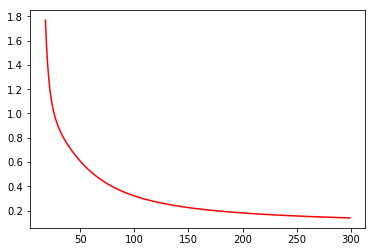

In [65]:
### Ejecutemos el algoritmo con las variables normalizadas ###

theta_values, cost_vect = gradient_descent(X_train_features_norm, y, theta_vector, alpha, iterations)

plt.plot(cost_vect, color='red', label = 'Costo')
plt.show()

C:\Users\Isa Miranda\Documents\UFM\7mo SEMESTRE\Machine_Learning\envs\ml_ufm\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\Isa Miranda\Documents\UFM\7mo SEMESTRE\Machine_Learning\envs\ml_ufm\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


#####################
Iteracion:  0
Costo:  nan
#####################
Iteracion:  50
Costo:  nan
#####################
Iteracion:  100
Costo:  nan
#####################
Iteracion:  150
Costo:  nan
#####################
Iteracion:  200
Costo:  nan
#####################
Iteracion:  250
Costo:  nan
Costo:  nan


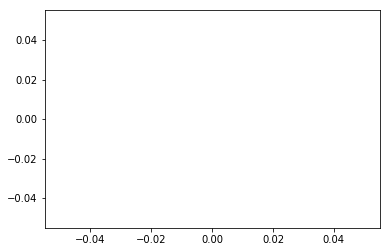

In [66]:
### Ejecutemos el algoritmo con las variables estandarizadas, llama a la funcion gradient_descent ###
## Recuerda utilizar X_train_features_std ##

''' Ingresa tu codigo aqui: '''
theta_values_std, cost_vect = gradient_descent(X_train_features_std, y, theta_vector, alpha, iterations)

plt.plot(cost_vect, color='red', label = 'Costo')
plt.show()

## Predicion

Esta funcion la vamos a utilizar para probar nuestro algoritmo.
Vamos a comprar los theta values de nuestro algoritmo
* theta_values (normalizado)
* theta_values_std (estandarizado)

In [67]:
def predict(x,w): 
    x_features = np.ones((x.shape[0]+1,))
    x_features[:-1,] = x
    
    prediccion = round(get_hipotesis(x_features,w) * 100,2)
    print('Hay una probabilidad de %f %% que sea un numero 6' % prediccion)

In [68]:
X_test_norm = normalizar(X_test)
X_test_std = estandarizacion(X_test)

C:\Users\Isa Miranda\Documents\UFM\7mo SEMESTRE\Machine_Learning\envs\ml_ufm\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Label: 0.0


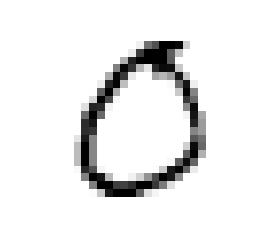

Features normalizadas:
Hay una probabilidad de 0.020000 % que sea un numero 6
Features estandarizadas:
Hay una probabilidad de 9.210000 % que sea un numero 6


In [69]:
print('Label:', y_test[50])

mostrar_digito(X_test[50])

print("Features normalizadas:")
predict(X_test_norm[50], theta_values)
print("Features estandarizadas:")
predict(X_test_std[50], theta_values_std)

Label: 4.0


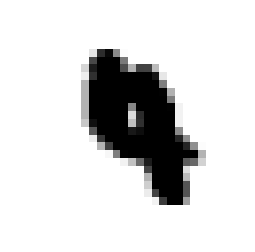

Features normalizadas:
Hay una probabilidad de 0.020000 % que sea un numero 6
Features estandarizadas:
Hay una probabilidad de 32.990000 % que sea un numero 6


In [70]:
print('Label:', y_test[5000])

mostrar_digito(X_test[5000])

print("Features normalizadas:")
predict(X_test_norm[5000], theta_values)
print("Features estandarizadas:")
predict(X_test_std[5000], theta_values_std)

Label: 6.0


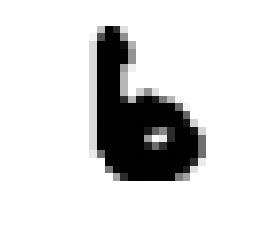

Features normalizadas:
Hay una probabilidad de 53.620000 % que sea un numero 6
Features estandarizadas:
Hay una probabilidad de 100.000000 % que sea un numero 6


In [53]:
print('Label:', y_test[6590])

mostrar_digito(X_test[6590])

print("Features normalizadas:")
predict(X_test_norm[6590], theta_values)
print("Features estandarizadas:")
predict(X_test_std[6590], theta_values_std)

# Regresion Logistica con Sklearn

In [54]:
from sklearn.linear_model import SGDClassifier


In [55]:
y_train_6 = (y_train == 6)  
y_test_6 = (y_test == 6)

In [56]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000)
sgd_clf.fit(X_train, y_train_6)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

## Probando el Clasificador

0.0


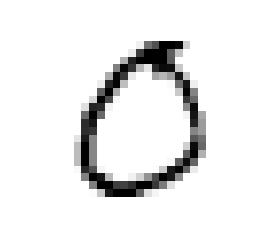

Es un numero 6?


array([False])

In [57]:
print(y_test[50])

digito = X_test[50]
mostrar_digito(digito)

print("Es un numero 6?")
sgd_clf.predict(digito.reshape(1, -1))

4.0


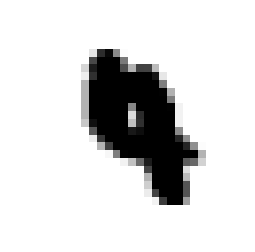

Es un numero 6?


array([False])

In [58]:
print(y_test[5000])

digito = X_test[5000]
mostrar_digito(digito)

print("Es un numero 6?")
sgd_clf.predict(digito.reshape(1, -1))

6.0


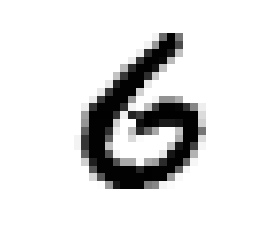

Es un numero 6?


array([ True])

In [59]:
print(y_test[6500])

digito = X_test[6500]
mostrar_digito(digito)

print("Es un numero 6?")
sgd_clf.predict(digito.reshape(1, -1))

6.0


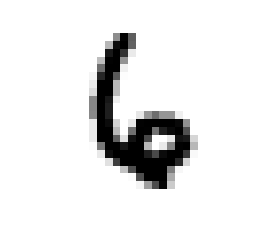

Es un numero 6?


array([ True])

In [60]:
print(y_test[6550])

digito = X_test[6550]
mostrar_digito(digito)

print("Es un numero 6?")
sgd_clf.predict(digito.reshape(1, -1))